# Training a model using Tensorflow and neural networks

## some review:

## The data:

In [1]:
import numpy as np
time_array = np.array([ 0.        ,  0.41666667,  0.83333333,  1.25      ,  1.66666667,
        2.08333333,  2.5       ,  2.91666667,  3.33333333,  3.75      ,
        4.16666667,  4.58333333,  5.        ,  5.41666667,  5.83333333,
        6.25      ,  6.66666667,  7.08333333,  7.5       ,  7.91666667,
        8.33333333,  8.75      ,  9.16666667,  9.58333333, 10.        ])
CA_inv_array = np.array([0.09955774, 0.10041539, 0.10164106, 0.10040534, 0.10151214,
       0.1027833 , 0.10252228, 0.10259392, 0.10369246, 0.10371607,
       0.10400771, 0.10517007, 0.10549644, 0.10558765, 0.10639114,
       0.10600782, 0.10506377, 0.10734534, 0.10655902, 0.10820498,
       0.1077726 , 0.10985819, 0.10912644, 0.11053292, 0.10939707])

In [2]:
import tensorflow as tf

In [4]:
#Display only errors in tensor flow:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [14]:
#data:
time_array = np.array([ 0.        ,  0.41666667,  0.83333333,  1.25      ,  1.66666667,
        2.08333333,  2.5       ,  2.91666667,  3.33333333,  3.75      ,
        4.16666667,  4.58333333,  5.        ,  5.41666667,  5.83333333,
        6.25      ,  6.66666667,  7.08333333,  7.5       ,  7.91666667,
        8.33333333,  8.75      ,  9.16666667,  9.58333333, 10.        ], dtype = float)
CA_inv_array = np.array([0.09955774, 0.10041539, 0.10164106, 0.10040534, 0.10151214,
       0.1027833 , 0.10252228, 0.10259392, 0.10369246, 0.10371607,
       0.10400771, 0.10517007, 0.10549644, 0.10558765, 0.10639114,
       0.10600782, 0.10506377, 0.10734534, 0.10655902, 0.10820498,
       0.1077726 , 0.10985819, 0.10912644, 0.11053292, 0.10939707], dtype = float)
#our case the data are in float format
#but we should keep it in case
CA_array = np.array(1/CA_inv_array)

## Training data:

In [6]:
for i,c in enumerate (time_array):
  print ('{} resident time in the reactor >> {} Concentration at this time'.format (c, 1/CA_inv_array[i]))

0.0 resident time in the reactor >> 10.044422462783908 Concentration at this time
0.41666667 resident time in the reactor >> 9.958632835066417 Concentration at this time
0.83333333 resident time in the reactor >> 9.838543596455999 Concentration at this time
1.25 resident time in the reactor >> 9.959629637228458 Concentration at this time
1.66666667 resident time in the reactor >> 9.851038506330376 Concentration at this time
2.08333333 resident time in the reactor >> 9.7292069820681 Concentration at this time
2.5 resident time in the reactor >> 9.75397737935598 Concentration at this time
2.91666667 resident time in the reactor >> 9.747166303812156 Concentration at this time
3.33333333 resident time in the reactor >> 9.643902748570147 Concentration at this time
3.75 resident time in the reactor >> 9.641707403683924 Concentration at this time
4.16666667 resident time in the reactor >> 9.61467183538605 Concentration at this time
4.58333333 resident time in the reactor >> 9.508408618535672 

## Create the model:

### build a tensorflow layer:

In [11]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1]) #one input which is time

In [12]:
model  = tf.keras.Sequential([l0])

In [13]:
model.compile (loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.1))

### Model training:

In [16]:
CA_array

array([10.04442246,  9.95863284,  9.8385436 ,  9.95962964,  9.85103851,
        9.72920698,  9.75397738,  9.7471663 ,  9.64390275,  9.6417074 ,
        9.61467184,  9.50840862,  9.47899285,  9.47080459,  9.39927892,
        9.43326634,  9.51802891,  9.3157281 ,  9.38447069,  9.24171882,
        9.27879628,  9.10264405,  9.16368206,  9.04707846,  9.14101264])

In [19]:
history = model.fit(time_array,CA_array, epochs = 500, verbose = False)
print ("finished")

finished


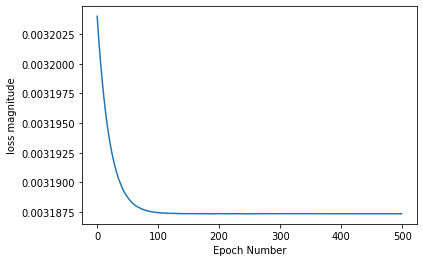

In [20]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('loss magnitude')
plt.plot(history.history['loss'])

In [21]:
print(model.predict([20]))

[[8.165707]]


## Exploring the algorithm behind this model:

In [23]:
print ("the layer variables are: \n")
print("{}".format (l0.get_weights()))


the layer variables are: 

[array([[-0.09099752]], dtype=float32), array([9.985657], dtype=float32)]


In [24]:
print (model.predict([10
                    ]))

[[9.075682]]
